## Predict the S&P 500 index price

Author - Sathish Manthani  
Date - 05/25/2020  
Course - DSC630 Predictive Analytics

## Abstract

Predicting stock prices is a popular usecase for machine learning and predictive analytics. I’m going to take a stab at it with this project.  
Apart from the historical price changes of the company, a lot of other factors influence the stock prices. Like, the current overall market conditions (Bull market/Bear market), the conditions of the industry (e.g. oil industry), leadership changes within the company or any new acquisitions etc., So, in order to do predict the stock price, we also have to analyze the sentiment of the market by scraping the published articles, news and social media data. However, I will just stick to technical and fundamental analysis of the stocks to predict its price in this project.


## Problem Statement

S&P 500 is the stock market index that measures the stock performance of 500 large companies in USA. I want to predict the stock prices for it based on the available variables and historical data. I know the historical prices are no clear indicators of whether a price will go up or down in future. With that risk, I’ll use predictive analytics and various machine learning algorithms like Ordinary Least Squares, k-nearest neighbors, Neural networks and Long Short Term Memory(LSTM) to predict the stock price.  

## Scope

In this project, I will be evaluating different machine learning methods for the best prediction outcome based on the historical data and fundamentals of the S&P 500. What I will not be considering is the sentiment of the market. Sentimental analysis usually involves analyzing the current overall market trends, published articles, political news and greed/fear factor of the people. So, I will limit the scope of the project to fundamental and technical analysis of the stocks to predict the S&P performance. 

## Preliminary Requirement

I looked at multiple datasets on Kaggle and other data sites for stock market data. The amount of data available on the web related to stock market is overwhelming. I chose Yahoo Finance API to fetch historical stock market data. The good thing about this API is it has data since 1990s and I would use that data for better modeling.  

The overall technical approach is going to be - I will first load the dataset into the kernel, perform exploratory data analysis to determine the distribution and relationship among the variables. Correlation matrix tells us the strength of relationship between variables. I will split the dataset into two parts (train and test data sets) and apply supervised machine learning techniques to predict the price of the stock. Finally, I will measure the accuracy of the models using ROC curve and Confusion matrix.

## Data Sources 

I initially thought of using datahub's dataset from the below link:

https://datahub.io/core/s-and-p-500-companies-financials

But I used web.DataReader method to fetch data directly from **Yahoo Finance API** into dataframe.

In [1]:
# Import required packages
import pandas_datareader.data as web #Web method to read data from web
import datetime  # For date conversion  

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 5, 31)

#Call Yahoo Finance API to fetch data for Standard & Poor 500 Index (tikcer: ^GSPC) for date range between 1990 till today.
sp500_df = web.DataReader("^GSPC", 'yahoo', start, end)

dates =[]
for x in range(len(sp500_df)):
    newdate = str(sp500_df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

# Add date values also as a first column
sp500_df.insert(0,'Date', dates)

# Save the data to CSV file for reference
sp500_df.to_csv(r'data/sp500_data.csv', index = False)

### Import the libraries required for analysis

Load the libraries required to do the data import, data clean up and visualization. 

In [2]:
# Import the required libraries
import pandas as pd
import yellowbrick #Yellowbrick is the visualization library built from scikit-learn and matplotlib
import matplotlib.pyplot as plt # for plots
import seaborn as sns
import numpy as np
%matplotlib inline

Let's peek into the dataset to see what's the data look like and what features do they have.

### Glimpse of the data

Take look at the first few rows of the dataset so you get a feel of the data.  

In [3]:
# Look at the data
sp500_df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2000-01-03,2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


Look at descriptive statistics (min, max, mean and quartiles) to understand the range of the numeric fields.

### Describe data

In [4]:
# what type of variables are in the table 
print("Describe Data")
sp500_df.describe()

Describe Data


,High,Low,Open,Close,Volume,Adj Close
count,5130.000000,5130.000000,5130.000000,5130.000000,5.130000e+03,5130.000000
mean,1610.995689,1591.619046,1601.711898,1601.876674,3.134990e+09,1601.876674
std,613.904379,610.780283,612.468993,612.525419,1.508044e+09,612.525419
min,695.270020,666.789978,679.280029,676.530029,3.560700e+08,676.530029
25%,1164.680023,1146.172546,1156.892487,1156.852478,1.697700e+09,1156.852478
50%,1380.200012,1360.964966,1369.579956,1369.574951,3.243340e+09,1369.574951
75%,2038.142456,2015.500000,2026.562531,2026.080017,3.945430e+09,2026.080017
max,3393.520020,3378.830078,3380.449951,3386.149902,1.145623e+10,3386.149902


Summary of the data is displayed below; it gives fair idea about unique values in each variable.

###  Summary of the data

In [5]:
print("Summarized Data")
sp500_df.describe(include=['O'])

Summarized Data


,Date
count,5130
unique,5130
top,2015-11-27
freq,1


As you can see from the above results, all rows are unique

###  Datatype Check

Look at the datatypes of the column names and see if there are any columns that need to be type casted to a more meaningful type.  
It happens a lot of times on Date columns, formatting maybe required. Date fields must be date format, as it helps grouping data by day, month, quarter or year.  
Especially in charting the data by time-series.

In [6]:
# Data type check
sp500_df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Data types are looking good to me.

### NULL check

NULL value check – Null or missing values can lead to incorrect machine learning models. So, its important to deal with them before performing any analysis on the data. There are several approaches on filling these data gaps. Using the last value or mean value or zero or removing the observation. Will see which one makes sense and will take appropriate action. 

In [7]:
# Null value check
sp500_df.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

There are no nulls in any of the variables. So we are good.

## Big 5 Stocks and S&P 500

I want to see how Top 5 stocks are influencing S&P 500 and also want to check how they correlated with each other

In [8]:
tickers = ['AAPL','MSFT','GOOGL','AMZN', 'FB', '^GSPC']

start = datetime.datetime(2015, 4, 9)
end = datetime.datetime(2020, 4, 9)
top5_df = pd.DataFrame()
#Call Yahoo Finance API to fetch data for Top 5 Tickers and S&P 500 for date range between 2010 till today.
for ticker in tickers:
    df1 = web.DataReader(ticker, 'yahoo', start, end)
    top5_df[ticker] = df1['Adj Close']
top5_df.rename(columns = {'^GSPC':'S&P500'}, inplace = True)

# Also adding Date as column
dates =[]
for x in range(len(top5_df)):
    newdate = str(top5_df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

# Add date values also as a first column
top5_df.insert(0,'Date', dates)
    
top5_df.head()

,Date,AAPL,MSFT,GOOGL,AMZN,FB,S&P500
Date,,,,,,,
2015-04-09,2015-04-09,116.153618,37.298008,548.020020,383.540009,82.169998,2091.179932
2015-04-10,2015-04-10,116.649216,37.513802,548.539978,382.649994,82.040001,2102.060059
2015-04-13,2015-04-13,116.419769,37.549770,548.640015,382.359985,83.010002,2092.429932
2015-04-14,2015-04-14,115.914986,37.450867,539.780029,385.109985,83.519997,2095.840088
2015-04-15,2015-04-15,116.355522,37.999367,541.039978,383.450012,82.709999,2106.629883


### Correlation - S&P500 and Big 5

A visualization of these correlations would make it easy for us to identify stronger variable relationship. 

Text(0.5, 1.0, 'Top 5 Stocks Correlation with S&P 500')

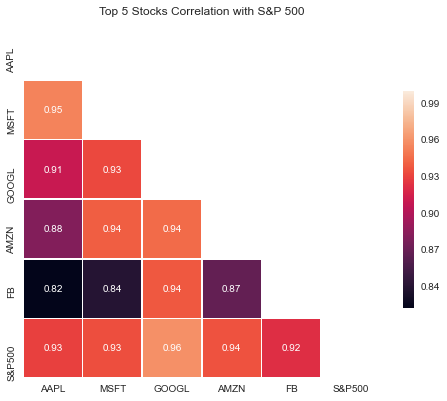

In [9]:
# calculate correlation matrix
corr = top5_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})
ax.set_title('Top 5 Stocks Correlation with S&P 500')

From the above correlation graph, we can see that s&p 500 stock's correlation is very strong with other stocks.   
That means each of these stocks are moving in sync with S&P 500.

### Returns - S&P 500 and Big 5

Rate of return tells what % is gained or lost over a period of time. It is calculated with the below formula:  

** Rate of Return % = (Curent Price - Starting Price)/ Starting Price * 100 ** 

I'm going to plot the yearly returns of the big 5 stocks along with S&P 500 in last 5 years

Text(0.5, 1.0, 'Big 5 stocks and S&P 500 Returns in last 5 Years')

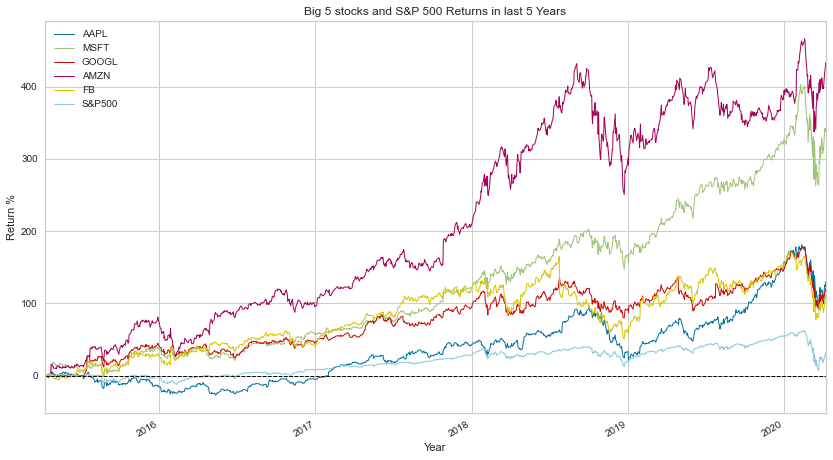

In [10]:
top5_df_dup = top5_df.copy() # make a copy of the close dataframe to make changes

# Removing date field 
top5_df_dup = top5_df_dup.drop(['Date'],axis=1)

# Calculating a Simple return
top5_df_dup = (top5_df_dup - top5_df_dup.iloc[0, :])/top5_df_dup.iloc[0, :]*100 

# plot the rate of return over time
top5_df_dup.plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Return %')
plt.title('Big 5 stocks and S&P 500 Returns in last 5 Years')


From the above plot, Amazon had a great run in last 5 years followed by Microsoft. Another interesting observation is - MSFT and AMZN were far apart in terms of returns in 2018-19 but MSFT performed amazing well later. 
S&P 500 had lower returns than other individual stocks. That is expected because I took the big 5 stocks for comparision which are more likely be the top performers.  

### Annualized Returns - S&P500 and Big 5

Bar chart gives us a clear visualization of returns.   
So, let's look at the total returns of Big 5 stocks and S&P 500 in Bar chart.

C:\Users\siris\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


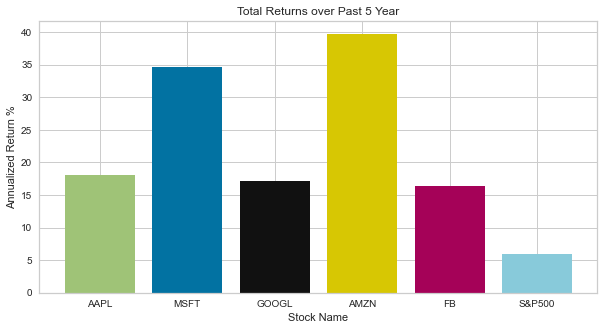

In [11]:
# calculate annualized return with the 5-year simple return
annual_retn = {}
for t in top5_df_dup.columns:
    ## Annulized returns averaged for last 5 years
    annual_retn[t] = ((top5_df_dup[t][-1:].values/100 + 1)**(1/5) - 1)*100
list2 = []
for key, value in annual_retn.items():
    list2.append(value[0])
    
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(list(annual_retn.keys()),list2,color='gbkymcr')
plt.xlabel('Stock Name')
plt.ylabel('Annualized Return %')
plt.title('Total Returns over Past 5 Year')
plt.show()

From the above plot, Amazon had amazing returns at 40% rate annually in last 5 years and S&P 500 had about 6% returns annually.

### Daily Returns of S&P 500 (Simple Returns)

Now let's also visualize daily percentage change in stock value

In [12]:
# Get `Adj Close` and assign to `daily_close`
daily_close = sp500_df['Adj Close']

# Daily returns percentage change
sp500_df['Return'] = 100 * (sp500_df['Adj Close'].pct_change())

# Rounding the change to 2 digits after decimal
daily_pct_chg = round(sp500_df['Return'],2)

# Print `daily_pct_c`
daily_pct_chg.head()

Date
2000-01-03     NaN
2000-01-04   -3.83
2000-01-05    0.19
2000-01-06    0.10
2000-01-07    2.71
Name: Return, dtype: float64

Let's plot the daily simple returns to visualize it better

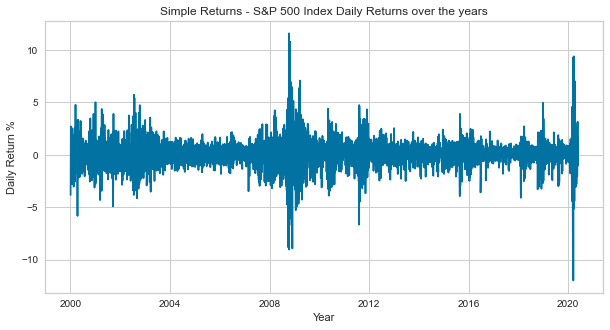

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(sp500_df['Return'], color='b')
plt.xlabel('Year')
plt.ylabel('Daily Return %')
plt.title('Simple Returns - S&P 500 Index Daily Returns over the years')
plt.show()

In [14]:
# Describe
sp500_df['Return'].describe()

count    5129.000000
mean        0.021705
std         1.255181
min       -11.984055
25%        -0.478899
50%         0.054917
75%         0.572098
max        11.580037
Name: Return, dtype: float64

As you can see, most of the days are between (-4,4) range but there are few occasions where the daily percentages are high.  
We also know S&P 500 lost large % during 2008-09 financial crisis and during 2020 March.
Large -ve single day Percentage Change occured in 2020 March which is -11.98%.
Average daily % change over the last 20 years is 0.033%.  
Please note this graph only shows daily percentage changes and stocks could slowly go down or up over the days too which is not captured here.  

### Daily Log Returns of S&P 500

There is an alternative way of showing returns. Let's also use Log transformation to show the returns.  

Formula:  
Log returns = log(current_price / previous_price)  

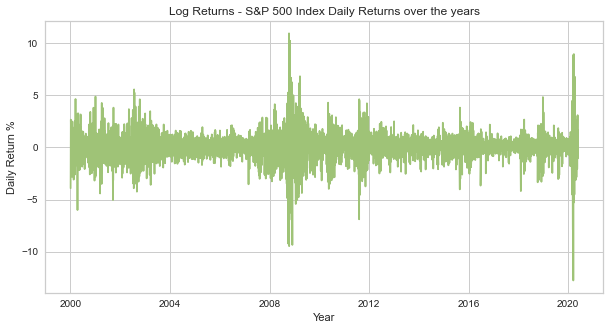

In [15]:
# Daily log returns
daily_log_returns = np.log((daily_close / daily_close.shift(1)))*100

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(daily_log_returns,color='g')
plt.xlabel('Year')
plt.ylabel('Daily Return %')
plt.title('Log Returns - S&P 500 Index Daily Returns over the years')
plt.show()

In [16]:
# Describe
daily_log_returns.describe()

count    5129.000000
mean        0.013813
std         1.257111
min       -12.765220
25%        -0.480049
50%         0.054902
75%         0.570467
max        10.957197
Name: Adj Close, dtype: float64

From the plot, Daily Log returns look very similar to Daily Simple Returns but if you look at mean, max values.  
Log values are smaller than Simple returns.  

### Distribution of S&P 500 Daily returns

C:\Users\siris\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\siris\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\siris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\siris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


count    5129.000000
mean        0.021685
std         1.255191
min       -11.980000
25%        -0.480000
50%         0.050000
75%         0.570000
max        11.580000
Name: Return, dtype: float64

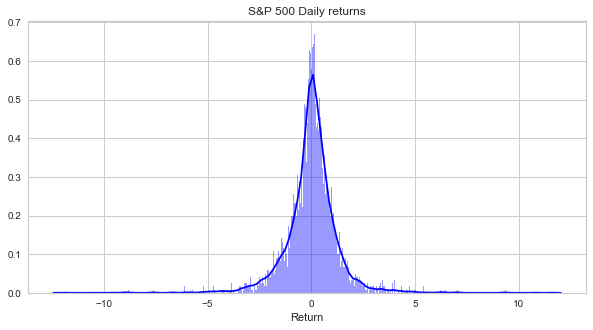

In [17]:
# histogram of Daily returns
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(sp500_df['Return'],bins=1000,color='blue')
plt.title("S&P 500 Daily returns")
plt.ioff()
daily_pct_chg.describe()

From the above plot, the distribution of daily returns looks normal distribution with Mean of 0.033 and standard deviation is 1.25. 

## Volatility

Volatility is basically the dispersion of the financial asset returns over time  
Volatility is often computed as the standard deviation of the stock price returns. Standard deviation basically tells us the spread of the data around the mean.  
Its important to remember that the higher the volatility,the riskier the asset is. So, let's calculate daily, monthly and annual volatility for S&P 500.   

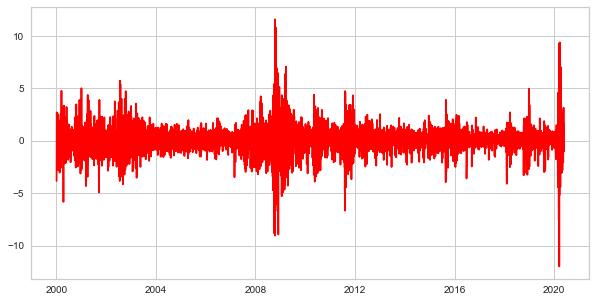

Daily volatility:  1.26%
Monthly volatility:  5.75%
Annual volatility:  19.93%


In [18]:
import math

# Plot the price returns
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(sp500_df['Return'],color = 'red')
plt.show()

# Calculate daily std of returns
std_daily = sp500_df['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
# At an average there are 21 trading days in a month
std_monthly = math.sqrt(21) * std_daily
print('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
# At an average there are 252 trading days in an year
std_annual = math.sqrt(252) * std_daily
print('Annual volatility: ', '{:.2f}%'.format(std_annual))

**Interpretation**:  
    Annualized S&P 500 volatility is very high. So what it means is the actual S&P 500 returns can fluctuate over 19% around the mean returns.



## Defining new Features and Target for S&P 500 

As part of EDA, we have seen how big 5 are influencing S&P 500. So, let's do the analysis on S&P 500 alone.  
Let's define features and targets for S&P 500 and see how they are correlated.

In [19]:
sp500_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,,
2000-01-03,2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN
2000-01-04,2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,-3.834467
2000-01-05,2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,0.192218
2000-01-06,2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,0.095568
2000-01-07,2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,2.709040


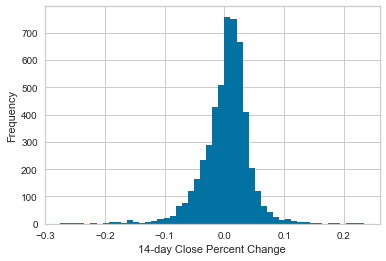

In [20]:
sp500_df['14d_close_pct'] = sp500_df['Adj Close'].pct_change(14)
sp500_df['14d_close_pct'].plot.hist(bins=50)
plt.xlabel('14-day Close Percent Change')
plt.show()

### Creating Features for 14 day Future Close and 14 day Future close percent change 

In [21]:
sp500_df['14d_future_close'] = sp500_df['Adj Close'].shift(-14)
sp500_df['14d_future_close_pct'] = sp500_df['14d_future_close'].pct_change(14)

In [22]:
import talib
sp500_df['ma14'] = talib.SMA(sp500_df['Adj Close'].values, timeperiod=14)
sp500_df['ma200'] = talib.SMA(sp500_df['Adj Close'].values, timeperiod=200)
sp500_df['rsi14'] = talib.RSI(sp500_df['Adj Close'].values, timeperiod=14)
sp500_df['rsi200'] = talib.RSI(sp500_df['Adj Close'].values, timeperiod=200)
sp500_df['ema14'] = talib.EMA(sp500_df['Adj Close'].values, timeperiod=14)
sp500_df['ema200'] = talib.EMA(sp500_df['Adj Close'].values, timeperiod=200)

### Correlation 

In [23]:
sp500_df = sp500_df.drop(['High','Low','Open','Close','Volume'],axis=1)

In [24]:
corr = sp500_df.corr()

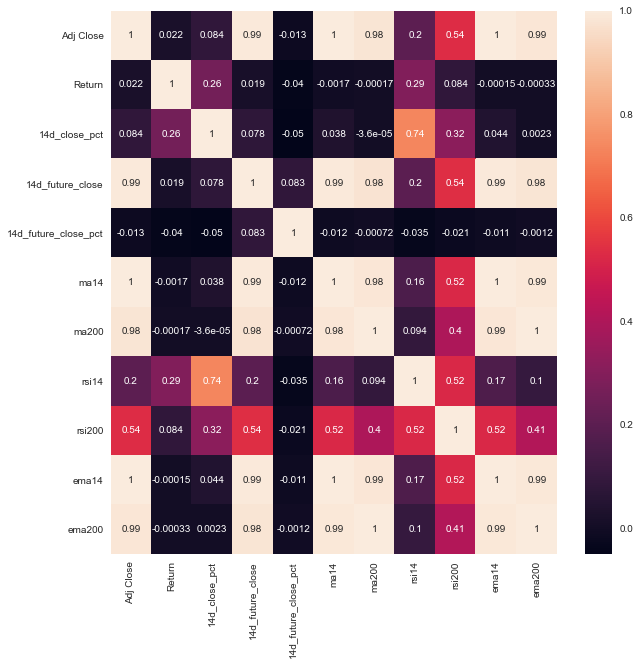

In [25]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True)

**Interpretation**:  
14-day future closing price, 14-day and 200-day moving average and 14-day and 200-day EMA are highly correlated with Adjusted Closing price of the stock.


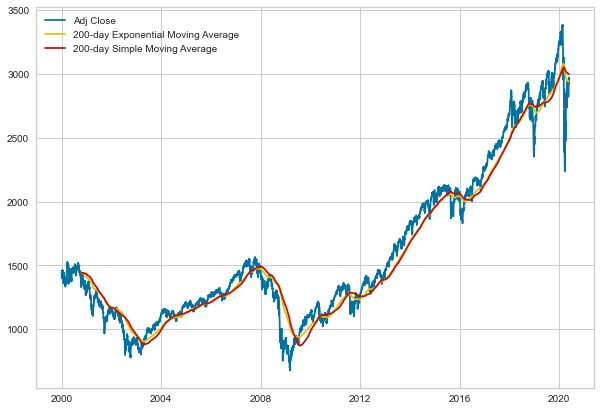

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(sp500_df[['Adj Close']], label='Adj Close')
plt.plot(sp500_df[['ema200']], label='200-day Exponential Moving Average', color='y')
plt.plot(sp500_df[['ma200']], label='200-day Simple Moving Average', color='r')
plt.legend()
plt.show()

**Interpration:**   
    Simple moving average and Exponential moving averages smoothes out the stock price curve and they are moving in sync with Adjusted close.
    

In [27]:
#Define features and target columns
features = sp500_df[['Return', 'ma200','rsi200','ema200']]
target = sp500_df['14d_future_close_pct']

## Test/Train data split

Time series data can’t be sliced randomly. So, I sliced first 85% data to train the model and remaining 15% (latest data) to test the models


In [28]:
# Using statsmodels.api to define train/test datasets 
import statsmodels.api as sm
linear_features = sm.add_constant(features)
train_size = int(0.85 * target.shape[0])
train_features = linear_features[:train_size]
train_targets = target[:train_size]
test_features = linear_features[train_size:]
test_targets = target[train_size:]

C:\Users\siris\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Buliding models

### 1 - Decision Tree

Let's create a decision tree to start with. 

In [29]:
# Taking first 4000 days of data as training dataset 
train_features=train_features[4000:]
train_targets=train_targets[4000:]

# Taking 200 days worth of data for testing
test_features=test_features[200:]
test_targets=test_targets[200:]

In [30]:
# Decision tree algorithm with max depth 5
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(train_features, train_targets)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

I chose depth 5, you can also try with different depths but remember the model overfits with increase in depth.

In [31]:
# Accuracy of the model for training dataset
print(decision_tree.score(train_features, train_targets))

0.7654777426316367


Accuracy on the training dataset is 0.765 which is excellent, so let's check how the decision tree performed on test dataset.  

In [32]:
# Accuracy of the model for Test dataset
print(decision_tree.score(test_features, test_targets))

-0.028028248246348086


Accuracy of the decision tree is -0.028. That means the tree didn't perform well for the test dataset. Decision tree probably overfit for the training dataset. 

Let's also scatter the predictions to visualize the performance of Decision tree

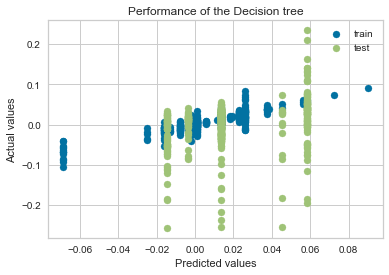

In [33]:
# Scatter the train predictions and test predictions versus their actual values
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Performance of the Decision tree')
plt.legend()
plt.show()

The graph looks good for training dataset but the predicted points are way off for test dataset.  

### 2 - Random forests

Decision tree didn't do well do well with test data. So let's give a try with random forests.  
Random forests suppose to reduce the variance of decision trees.  

In [34]:
# Random forest algorithm
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=200, 
                                     max_depth=5,
                                     max_features=5,
                                     random_state=42)
random_forest.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [35]:
# Model accuracy with test data
print(random_forest.score(train_features, train_targets))

0.8594172143264383


In [36]:
# Model accuracy with training data
print(random_forest.score(test_features, test_targets))

-0.031125605396473462


The accuracy is not great. That's because I used random hyperparameters to begin with.  
So, let's figure out what are the best hyperparameters for randomforests regressor.

In [37]:
# Using ParameterGrid to determine the best hyperparameters for random forest
from sklearn.model_selection import ParameterGrid
grid = {'n_estimators': [200], 'max_depth':[3, 4,5], 'max_features': [1,2,3,4]}
from pprint import pprint
pprint(list(ParameterGrid(grid)))


[{'max_depth': 3, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 2, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 4, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 2, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 4, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 2, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 4, 'n_estimators': 200}]


In [38]:
# Determine the best hyperparameters to use and run the model to find accuracy
test_scores = []
# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(grid):
    random_forest.set_params(**g) # ** is "unpacking" the dictionary
    random_forest.fit(train_features, train_targets)
    test_scores.append(random_forest.score(test_features, test_targets))  
# find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx])
print(ParameterGrid(grid)[best_idx])

0.023349302872722744
{'n_estimators': 200, 'max_features': 3, 'max_depth': 4}


**Interpretation:**  
    Random forests with hyperparameters {'n_estimators': 200, 'max_features': 3, 'max_depth': 4} have performed decently.  
    Accuracy of 0.023 and it is better accuracy than decsion trees. 


### 3 - Gradient boosting 

Boosted models are general class of machine learning algorithms.  
These work by iteratively fitting models such as decision trees to the data. They work by taking residual error of the first model to the next model and so on.  


In [39]:
# Build the gradient boosting algorithm with some hyperparameters
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gb.fit(train_features, train_targets)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=4, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
## Accuracy of the training dataset
print(gb.score(train_features, train_targets))

0.7192940852642007


In [41]:
## Accuracy of the test dataset
print(gb.score(test_features, test_targets))

0.029384410069928202


**Interpretation:**  
    Gradient boosting gave us slightly better performance (0.029) than previous models but its still not enough to predict the stock prices accurately.  

### 4 - Neural networks

#### Standardization

In [42]:
# Lets standadize the data before running neural netowork models
# I used the standardscaler for standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_train_features = sc.fit_transform(train_features)
scaled_test_features = sc.transform(test_features)

Building neural networks using scaled features using Keras

In [43]:
from keras.models import Sequential
from keras.layers import Dense
#Creating the model
model = Sequential()

#Lets add layers
#First layer with 50 nodes, specify the input dim as scaled features from training set. I used ReLu activation function
model.add(Dense(50, input_dim=scaled_train_features.shape[1], activation='relu'))

#Another layer with 10 nodes
model.add(Dense(10, activation='relu'))

#Output layer and using linear for regression
model.add(Dense(1, activation='linear'))

Using TensorFlow backend.


In [44]:
# Optimizer determines how fast the network learns. I'm going to use Adam optimizer and loss function as Mean square error
model.compile(optimizer='adam', loss='mse')

#Let fit the model with epochs 50
history = model.fit(scaled_train_features, train_targets, epochs=50)

Epoch 1/50
360/360 [==============================] - 0s 252us/step - loss: 0.0613
Epoch 2/50
360/360 [==============================] - 0s 53us/step - loss: 0.0073
Epoch 3/50
360/360 [==============================] - 0s 53us/step - loss: 0.0069
Epoch 4/50
360/360 [==============================] - 0s 44us/step - loss: 0.0036
Epoch 5/50
360/360 [==============================] - 0s 105us/step - loss: 0.0034
Epoch 6/50
360/360 [==============================] - 0s 58us/step - loss: 0.0027
Epoch 7/50
360/360 [==============================] - 0s 64us/step - loss: 0.0026
Epoch 8/50
360/360 [==============================] - 0s 83us/step - loss: 0.0023
Epoch 9/50
360/360 [==============================] - 0s 75us/step - loss: 0.0022
Epoch 10/50
360/360 [==============================] - 0s 55us/step - loss: 0.0020
Epoch 11/50
360/360 [==============================] - 0s 50us/step - loss: 0.0018
Epoch 12/50
360/360 [==============================] - 0s 64us/step - loss: 0.0016
Epoch 13/50

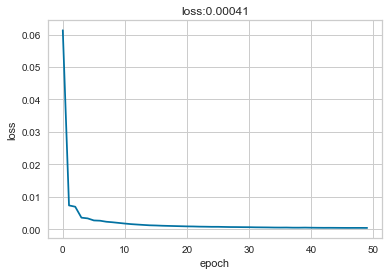

In [45]:
## Plotting the loss
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

As you can see the loss has significantly dropped from epoch 10 through 50

0.3998508005590149
-77.58477985570704


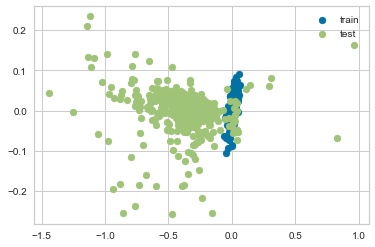

In [46]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model.predict(scaled_train_features)
test_preds = model.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

**Interpratition:**  
    Neural network performed poorly with the dataset. That's because I didn't tune the model well, there's a lot of scope for improvment. Like creating custom loss functions and using different activation functions etc.,   
    I could have tried other options but due to lack of time I'm going to try one more model.

### 5 - Facebook's prophet

In [47]:
# Defining proper training and test data sets
train_size = int(sp500_df.shape[0]*0.85)
train_df = sp500_df.iloc[:train_size]
test_df = sp500_df.iloc[train_size+1:]

In [48]:
# Building model using fbprophet
import fbprophet as prophet
# reset index to get date_time as a column
prophet_df = sp500_df[['Date','Adj Close']]

# prepare the required dataframe
prophet_df.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)
prophet_df.ds = pd.to_datetime(prophet_df.ds)

prophet_df = prophet_df[['ds','y']]

Importing plotly failed. Interactive plots will not work.
C:\Users\siris\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\siris\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
# Prophet model
pro_model = prophet.Prophet()
pro_model.fit(prophet_df)
#Create future dataframe
test_dates = pro_model.make_future_dataframe(periods=test_df.shape[0])
#Forecast the data using the model
forecast_df = pro_model.predict(test_dates)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


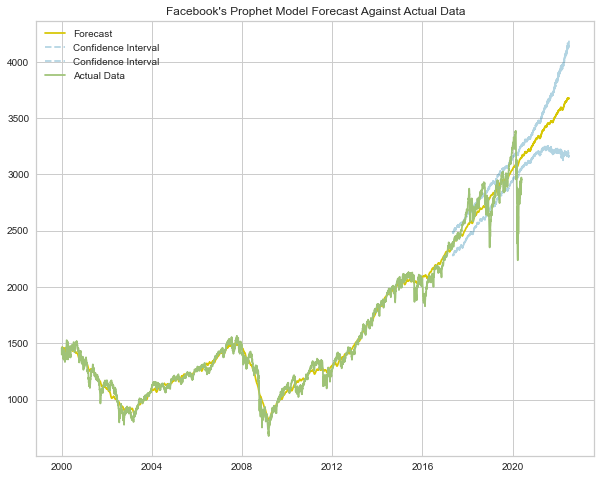

In [50]:
# Plot the forecasted data and current data  
forecast_df['datetime'] = forecast_df['ds']
forecast_df.set_index('datetime', inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
# plot against true data
plt.plot(forecast_df.yhat,c='y',label='Forecast')
plt.plot(forecast_df.yhat_lower.iloc[train_size+1:], 
         linestyle='--',
         c='b',
         alpha=0.3,
         label='Confidence Interval')
plt.plot(forecast_df.yhat_upper.iloc[train_size+1:],
         linestyle='--',
         c='b',
         alpha=0.3,
label='Confidence Interval')
plt.plot(prophet_df.y,c='g',label='Actual Data')
plt.legend()
plt.title('Facebook\'s Prophet Model Forecast Against Actual Data')
plt.show()

In [56]:
forecast_df.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
datetime,,,,,,,,,,,,,,,,,,,
2022-06-26,2022-06-26,3668.832218,3161.726424,4151.430819,3168.363226,4129.447820,1.376543,1.376543,1.376543,-2.861406,-2.861406,-2.861406,4.237949,4.237949,4.237949,0.0,0.0,0.0,3670.208762
2022-06-27,2022-06-27,3669.522969,3154.907678,4141.256760,3168.232512,4131.328404,3.944414,3.944414,3.944414,0.269423,0.269423,0.269423,3.674991,3.674991,3.674991,0.0,0.0,0.0,3673.467383
2022-06-28,2022-06-28,3670.213720,3167.716245,4138.921695,3168.101798,4133.208988,5.053979,5.053979,5.053979,1.788069,1.788069,1.788069,3.265910,3.265910,3.265910,0.0,0.0,0.0,3675.267700
2022-06-29,2022-06-29,3670.904471,3163.862178,4145.617330,3167.971084,4135.089572,3.902550,3.902550,3.902550,0.884451,0.884451,0.884451,3.018100,3.018100,3.018100,0.0,0.0,0.0,3674.807022
2022-06-30,2022-06-30,3671.595222,3154.193741,4186.593663,3167.840370,4136.970157,4.600890,4.600890,4.600890,1.665580,1.665580,1.665580,2.935310,2.935310,2.935310,0.0,0.0,0.0,3676.196112


In [52]:
metric_df = forecast_df.set_index('ds')[['yhat']].join(prophet_df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)

0.9833532394565548

R-square value is 0.98 which means the model is a great fit. Let's find out if its an overfit using Mean squared error and Mean absolute error.  


In [54]:
mean_squared_error(metric_df.y, metric_df.yhat)

6244.437141996572

Mean square error is decent so the model is a good fit. Let's check mean absolute error as well. 

In [55]:
mean_absolute_error(metric_df.y, metric_df.yhat)

51.490209354550025

Mean absolute error is 51 which is less.  
It means the predicted value can be 51 basis points away from the actual value either side of the curve at the maximum.

**Interpretition:**  
    From the above plot and R-square, mean square error and mean absolute error. I think Prophet predicts the stock prices with decent accuracy.

## Conclusion

The goal of this project is to predict the S&P index price using machine learning models.  
I started with data extraction of S&P 500 using Yahoo finance API. I extracted the data for the last 20 years.   
I have also extracted Big 5 stocks(Apple, Amazon, Microsoft, Facebook and Google) data for last 5 years to see how they compare to S&P 500 index. Upon analysis, I saw a strong correlation (more than 90% correlation) between the big 5 stocks to S&P 500. This was surprising, I know the correlation would be there but did not expect it to be this strong. So, that means all the big 5 stocks are moving in sync with the S&P 500 index.  
The daily returns of S&P 500 index is generally in the range of (-4% to +4%) except on few occasions. 
We also know S&P 500 lost large % during 2008-09 financial crisis and during 2020 March. Large single day “loss” occurred in 2020 March which is -11.98%, we also know this is due to covid-19 pandemic. Another observation is that the average daily % change over the last 20 years is 0.033%. That means, S&P 500 index tend to have positive returns in a long run.  
Before building models, I added few technical indicators as features to S&P 500 index.  
These features are Future price change, Simple moving averages, Relative Strength Index, and Exponential moving average.
Simple moving average is basically calculating the rolling window average over a given time interval. Relative Strength index measures the magnitude of price change. Exponential moving average is a weighted moving average which places more weight on the recent price change.  
I used 5 different models to predict the stock prices i.e. Decision trees, Random forests, Gradient boosting, Neural networks, and Facebook's prophet.  
Decision trees fit the training data well but did not perform well with test data. Then I tried Random forests, it gave a slightly better performance but not great.  
Gradient boosting model further improved the accuracy on the test data but its not enough to predict the S&P 500 index price.   
Later I tried Neural networks. Neural networks generally work great if you tune the parameters, improve the loss function and do the back propagation. I tried some basic modeling in neural networks, so it did not perform well.  
Finally, I tried Facebook’s Prophet for forecasting the S&P index price which showed good results (please look at the last plot). From the plot, the S&P 500 index is going to go up in next 2-3 years.  
Current S&P 500 index price is 2955.45 and according to the prophet forecasting model, its going to be at 3667.43 in 2 years from now (05/31/2022) with the confidence interval’s price range is (3183.69, 4121.55).

## References

[1] Python for Finance: Investment Fundamentals and Data Analytics - By 365 Careers    
[2] Datacamp - https://campus.datacamp.com/courses/importing-and-managing-financial-data-in-python/   
[3] https://www.investopedia.com/   
[4] Facebook's prophet https://pythondata.com/forecasting-time-series-data-with-prophet-part-1/